Contest is represented as a questionID. contest for president and vice president. There are two voters here, each has voted on each of the contests. 

In [6]:
import pandas as pd

# Replace 'path_to_your_file.csv' with the actual path to your CSV file
file_path = 'rcv.csv'

# Load the CSV data into a DataFrame
data = pd.read_csv(file_path)

# Display the DataFrame
data.head()


,eventid,questionid,questiondesc,statements,statementdescs
0,500023351,500023351001,Who would you nominate as candidate for President,"500023351001004,500023351001002,50002335100100...","Maize Moore,Daisy Duck,Minnie Mouse,Goodie Galina"
1,500023351,500023351002,Who would you nominate as candidate for Vice P...,"500023351002004,500023351002001,50002335100200...","Scrooge,Mickey Mouse,Donald Duck,Goofy"
2,500023351,500023351002,Who would you nominate as candidate for Vice P...,"500023351002001,500023351002002,50002335100200...","Mickey Mouse,Donald Duck,Goofy,Scrooge"
3,500023351,500023351001,Who would you nominate as candidate for President,"500023351001002,500023351001001","Daisy Duck,Minnie Mouse"


In [9]:
import pandas as pd
from collections import defaultdict

# Load the CSV data into a DataFrame
file_path = 'rcv.csv'
data = pd.read_csv(file_path)

# Split the 'statements' and 'statementdescs' columns into lists
data['statements'] = data['statements'].apply(lambda x: x.split(','))
data['statementdescs'] = data['statementdescs'].apply(lambda x: x.split(','))

def rank_choice_voting(data, questionid):
    # Filter data for the specific question
    question_data = data[data['questionid'] == questionid]
    
    # Initialize the vote counts
    rounds = 1

    # Extract votes
    votes = question_data['statementdescs'].tolist()

    while True:
        vote_counts = defaultdict(int)
        
        # Count the first-choice votes
        for vote in votes:
            if vote:
                vote_counts[vote[0]] += 1

        # Find the candidate with the most votes
        max_votes = max(vote_counts.values())
        total_votes = sum(vote_counts.values())

        # Check if the candidate has more than half of the votes
        if max_votes > total_votes / 2:
            winner = max(vote_counts, key=vote_counts.get)
            print(f"Winner: {winner}")
            break

        # Eliminate the candidate with the fewest votes
        min_votes = min(vote_counts.values())
        candidates_to_eliminate = [candidate for candidate, votes in vote_counts.items() if votes == min_votes]

        for candidate in candidates_to_eliminate:
            for vote in votes:
                if candidate in vote:
                    vote.remove(candidate)

        # Reset vote counts for the next round
        rounds += 1

    print(f"Rounds: {rounds}")

# Example usage
print("For President:")
rank_choice_voting(data, 500023351001)  # For President
print("\nFor Vice President:")
rank_choice_voting(data, 500023351002)  # For Vice President


### REPORT RESULTS BY CONTEST, WHICH IS QUESTIONS ID


For President:
Winner: Minnie Mouse
Rounds: 2

For Vice President:
Winner: Donald Duck
Rounds: 2


For President:


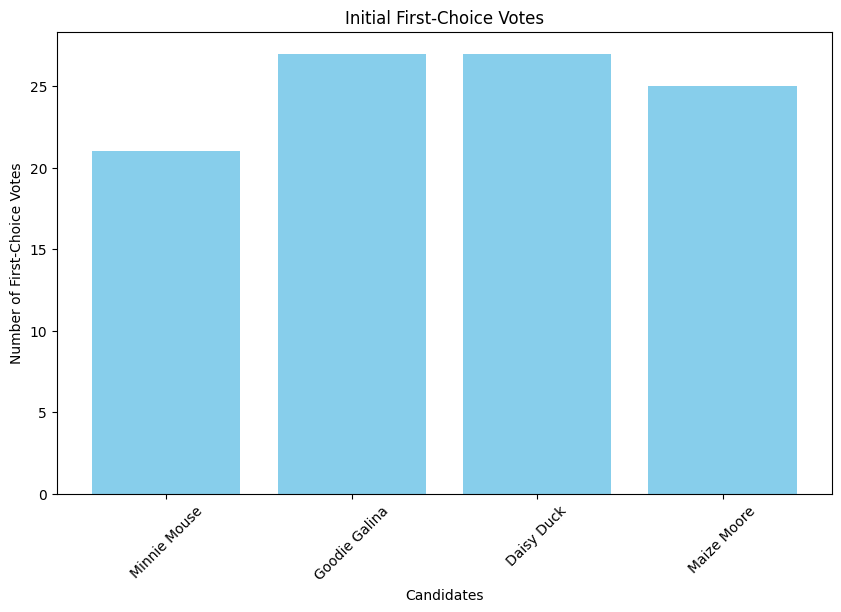


Round 1:
Minnie Mouse: 21 votes
Goodie Galina: 27 votes
Daisy Duck: 27 votes
Maize Moore: 25 votes
Eliminating candidate(s) with the fewest votes (21 votes): ['Minnie Mouse']
Votes after elimination in round 1:
Voter 1: ['Goodie Galina', 'Maize Moore', 'Daisy Duck']
Voter 2: ['Goodie Galina', 'Daisy Duck', 'Maize Moore']
Voter 3: ['Daisy Duck', 'Maize Moore', 'Goodie Galina']
Voter 4: ['Goodie Galina', 'Maize Moore', 'Daisy Duck']
Voter 5: ['Daisy Duck', 'Maize Moore', 'Goodie Galina']
Voter 6: ['Goodie Galina', 'Daisy Duck', 'Maize Moore']
Voter 7: ['Goodie Galina', 'Maize Moore', 'Daisy Duck']
Voter 8: ['Daisy Duck', 'Goodie Galina', 'Maize Moore']
Voter 9: ['Daisy Duck', 'Goodie Galina', 'Maize Moore']
Voter 10: ['Daisy Duck', 'Goodie Galina', 'Maize Moore']
Voter 11: ['Daisy Duck', 'Maize Moore', 'Goodie Galina']
Voter 12: ['Maize Moore', 'Goodie Galina', 'Daisy Duck']
Voter 13: ['Goodie Galina', 'Maize Moore', 'Daisy Duck']
Voter 14: ['Maize Moore', 'Daisy Duck', 'Goodie Galina']

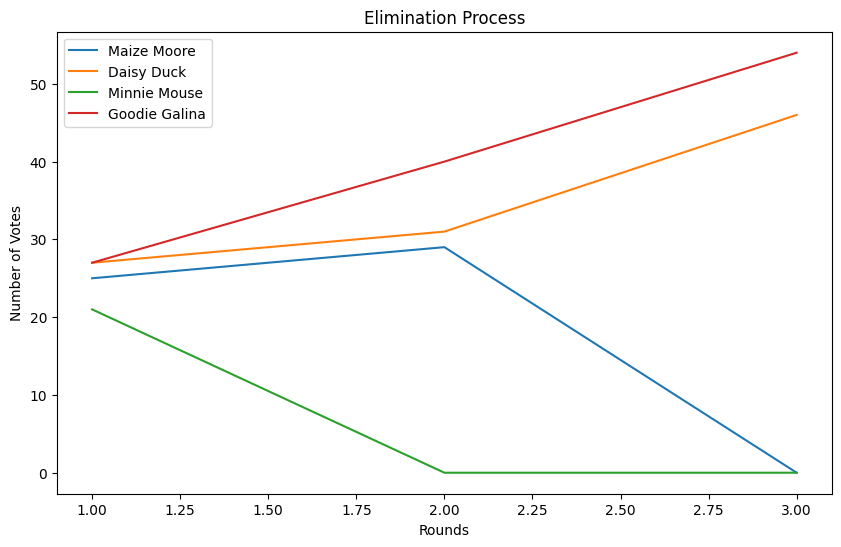


For Vice President:


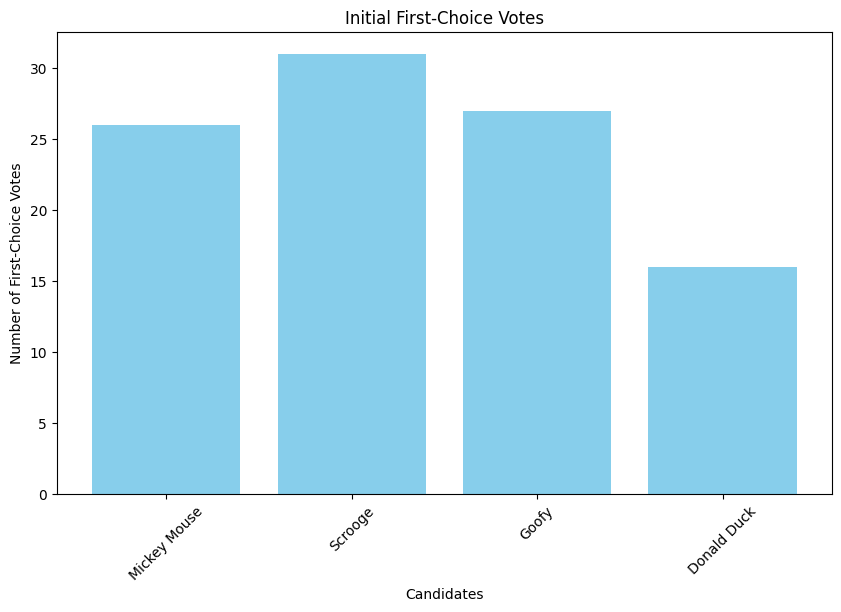


Round 1:
Mickey Mouse: 26 votes
Scrooge: 31 votes
Goofy: 27 votes
Donald Duck: 16 votes
Eliminating candidate(s) with the fewest votes (16 votes): ['Donald Duck']
Votes after elimination in round 1:
Voter 1: ['Mickey Mouse', 'Goofy', 'Scrooge']
Voter 2: ['Scrooge', 'Goofy', 'Mickey Mouse']
Voter 3: ['Scrooge', 'Mickey Mouse', 'Goofy']
Voter 4: ['Mickey Mouse', 'Goofy', 'Scrooge']
Voter 5: ['Mickey Mouse', 'Goofy', 'Scrooge']
Voter 6: ['Goofy', 'Mickey Mouse', 'Scrooge']
Voter 7: ['Mickey Mouse', 'Scrooge', 'Goofy']
Voter 8: ['Mickey Mouse', 'Scrooge', 'Goofy']
Voter 9: ['Scrooge', 'Goofy', 'Mickey Mouse']
Voter 10: ['Goofy', 'Mickey Mouse', 'Scrooge']
Voter 11: ['Scrooge', 'Goofy', 'Mickey Mouse']
Voter 12: ['Mickey Mouse', 'Scrooge', 'Goofy']
Voter 13: ['Mickey Mouse', 'Goofy', 'Scrooge']
Voter 14: ['Scrooge', 'Mickey Mouse', 'Goofy']
Voter 15: ['Goofy', 'Scrooge', 'Mickey Mouse']
Voter 16: ['Goofy', 'Scrooge', 'Mickey Mouse']
Voter 17: ['Scrooge', 'Goofy', 'Mickey Mouse']
Voter 18: 

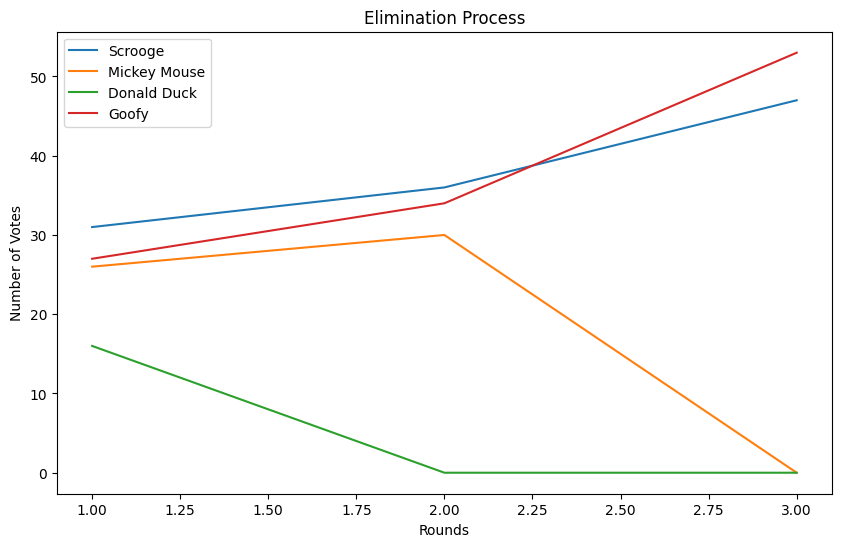

In [17]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import defaultdict

# Define candidates
president_candidates = ["Maize Moore", "Daisy Duck", "Minnie Mouse", "Goodie Galina"]
vp_candidates = ["Scrooge", "Mickey Mouse", "Donald Duck", "Goofy"]

# Define number of voters
num_voters = 100

# Generate random votes for President
president_votes = [random.sample(president_candidates, len(president_candidates)) for _ in range(num_voters)]

# Generate random votes for Vice President
vp_votes = [random.sample(vp_candidates, len(vp_candidates)) for _ in range(num_voters)]

# Create DataFrame
data = {
    'eventid': [500023351] * (2 * num_voters),
    'questionid': [500023351001] * num_voters + [500023351002] * num_voters,
    'questiondesc': ["Who would you nominate as candidate for President"] * num_voters + 
                    ["Who would you nominate as candidate for Vice President"] * num_voters,
    'statements': [','.join(map(str, range(500023351001001, 500023351001001 + len(president_candidates))))] * num_voters +
                  [','.join(map(str, range(500023351002001, 500023351002001 + len(vp_candidates))))] * num_voters,
    'statementdescs': [','.join(vote) for vote in president_votes] + [','.join(vote) for vote in vp_votes]
}

df = pd.DataFrame(data)

# Plotting functions
def plot_initial_first_choice_votes(df, questionid, candidates):
    # Filter data for the specific question
    question_data = df[df['questionid'] == questionid]

    # Extract votes
    votes = question_data['statementdescs'].apply(lambda x: x.split(',')).tolist()

    # Count the first-choice votes
    first_choice_counts = defaultdict(int)
    for vote in votes:
        if vote:
            first_choice_counts[vote[0]] += 1

    # Plot the first-choice votes
    plt.figure(figsize=(10, 6))
    plt.bar(first_choice_counts.keys(), first_choice_counts.values(), color='skyblue')
    plt.xlabel('Candidates')
    plt.ylabel('Number of First-Choice Votes')
    plt.title('Initial First-Choice Votes')
    plt.xticks(rotation=45)
    plt.show()

def plot_elimination_process(df, questionid, candidates):
    # Filter data for the specific question
    question_data = df[df['questionid'] == questionid]
    
    # Extract votes
    votes = question_data['statementdescs'].apply(lambda x: x.split(',')).tolist()
    
    rounds = 1
    elimination_process = []

    while True:
        vote_counts = defaultdict(int)
        
        # Count the first-choice votes
        for vote in votes:
            if vote:
                vote_counts[vote[0]] += 1
        
        # Store the counts for plotting
        elimination_process.append(vote_counts.copy())

        # Print current vote counts
        print(f"\nRound {rounds}:")
        for candidate, count in vote_counts.items():
            print(f"{candidate}: {count} votes")

        # Find the candidate with the most votes
        max_votes = max(vote_counts.values())
        total_votes = sum(vote_counts.values())

        # Check if the candidate has more than half of the votes
        if max_votes > total_votes / 2:
            print(f"Winner found in round {rounds}:")
            print(f"{max(vote_counts, key=vote_counts.get)} with {max_votes} votes")
            break

        # Eliminate the candidate with the fewest votes
        min_votes = min(vote_counts.values())
        candidates_to_eliminate = [candidate for candidate, votes in vote_counts.items() if votes == min_votes]

        print(f"Eliminating candidate(s) with the fewest votes ({min_votes} votes): {candidates_to_eliminate}")

        for candidate in candidates_to_eliminate:
            for vote in votes:
                if candidate in vote:
                    vote.remove(candidate)

        # Print the updated votes after elimination
        print(f"Votes after elimination in round {rounds}:")
        for i, vote in enumerate(votes, start=1):
            print(f"Voter {i}: {vote}")

        rounds += 1
    
    # Plot the elimination process
    plt.figure(figsize=(10, 6))
    for candidate in candidates:
        candidate_votes = [round_counts.get(candidate, 0) for round_counts in elimination_process]
        plt.plot(range(1, len(elimination_process) + 1), candidate_votes, label=candidate)

    plt.xlabel('Rounds')
    plt.ylabel('Number of Votes')
    plt.title('Elimination Process')
    plt.legend()
    plt.show()

# Example usage
print("For President:")
plot_initial_first_choice_votes(df, 500023351001, president_candidates)
plot_elimination_process(df, 500023351001, president_candidates)

print("\nFor Vice President:")
plot_initial_first_choice_votes(df, 500023351002, vp_candidates)
plot_elimination_process(df, 500023351002, vp_candidates)


In [11]:
import pandas as pd
from collections import defaultdict

# Load the CSV data into a DataFrame
file_path = 'rcv.csv'
data = pd.read_csv(file_path)

# Split the 'statements' and 'statementdescs' columns into lists
data['statements'] = data['statements'].apply(lambda x: x.split(','))
data['statementdescs'] = data['statementdescs'].apply(lambda x: x.split(','))

def rank_choice_voting(data, questionid):
    # Filter data for the specific question
    question_data = data[data['questionid'] == questionid]
    
    # Initialize the vote counts
    rounds = 1

    # Extract votes
    votes = question_data['statementdescs'].tolist()

    while True:
        print(f"\nRound {rounds}:")
        vote_counts = defaultdict(int)
        
        # Count the first-choice votes
        for vote in votes:
            if vote:
                vote_counts[vote[0]] += 1

        # Print current vote counts
        print("Current vote counts:")
        for candidate, count in vote_counts.items():
            print(f"{candidate}: {count} votes")

        # Find the candidate with the most votes
        max_votes = max(vote_counts.values())
        total_votes = sum(vote_counts.values())

        # Check if the candidate has more than half of the votes
        if max_votes > total_votes / 2:
            winner = max(vote_counts, key=vote_counts.get)
            print(f"\nWinner: {winner} with {max_votes} out of {total_votes} total votes.")
            break

        # Eliminate the candidate with the fewest votes
        min_votes = min(vote_counts.values())
        candidates_to_eliminate = [candidate for candidate, votes in vote_counts.items() if votes == min_votes]

        print(f"Candidates to eliminate (fewest votes - {min_votes} votes): {candidates_to_eliminate}")

        for candidate in candidates_to_eliminate:
            for vote in votes:
                if candidate in vote:
                    vote.remove(candidate)

        # Print the updated votes after elimination
        print("Updated votes after elimination:")
        for i, vote in enumerate(votes, start=1):
            print(f"Voter {i}: {vote}")

        # Reset vote counts for the next round
        rounds += 1

    print(f"\nTotal rounds: {rounds}")

# Example usage
print("For President:")
rank_choice_voting(data, 500023351001)  # For President
print("\nFor Vice President:")
rank_choice_voting(data, 500023351002)  # For Vice President


For President:

Round 1:
Current vote counts:
Maize Moore: 1 votes
Daisy Duck: 1 votes
Candidates to eliminate (fewest votes - 1 votes): ['Maize Moore', 'Daisy Duck']
Updated votes after elimination:
Voter 1: ['Minnie Mouse', 'Goodie Galina']
Voter 2: ['Minnie Mouse']

Round 2:
Current vote counts:
Minnie Mouse: 2 votes

Winner: Minnie Mouse with 2 out of 2 total votes.

Total rounds: 2

For Vice President:

Round 1:
Current vote counts:
Scrooge: 1 votes
Mickey Mouse: 1 votes
Candidates to eliminate (fewest votes - 1 votes): ['Scrooge', 'Mickey Mouse']
Updated votes after elimination:
Voter 1: ['Donald Duck', 'Goofy']
Voter 2: ['Donald Duck', 'Goofy']

Round 2:
Current vote counts:
Donald Duck: 2 votes

Winner: Donald Duck with 2 out of 2 total votes.

Total rounds: 2


In [13]:
import pandas as pd
import numpy as np
import random

# Define candidates
president_candidates = ["Maize Moore", "Daisy Duck", "Minnie Mouse", "Goodie Galina"]
vp_candidates = ["Scrooge", "Mickey Mouse", "Donald Duck", "Goofy"]

# Define number of voters
num_voters = 500

# Generate random votes for President
president_votes = [random.sample(president_candidates, len(president_candidates)) for _ in range(num_voters)]

# Generate random votes for Vice President
vp_votes = [random.sample(vp_candidates, len(vp_candidates)) for _ in range(num_voters)]

# Create DataFrame
data = {
    'eventid': [500023351] * (2 * num_voters),
    'questionid': [500023351001] * num_voters + [500023351002] * num_voters,
    'questiondesc': ["Who would you nominate as candidate for President"] * num_voters + 
                    ["Who would you nominate as candidate for Vice President"] * num_voters,
    'statements': [','.join(map(str, range(500023351001001, 500023351001001 + len(president_candidates))))] * num_voters +
                  [','.join(map(str, range(500023351002001, 500023351002001 + len(vp_candidates))))] * num_voters,
    'statementdescs': [','.join(vote) for vote in president_votes] + [','.join(vote) for vote in vp_votes]
}

df = pd.DataFrame(data)

# Save to CSV
df.to_csv('random_rcv_votes.csv', index=False)

# Display the DataFrame
print(df.head())


     eventid    questionid                                       questiondesc  \
0  500023351  500023351001  Who would you nominate as candidate for President   
1  500023351  500023351001  Who would you nominate as candidate for President   
2  500023351  500023351001  Who would you nominate as candidate for President   
3  500023351  500023351001  Who would you nominate as candidate for President   
4  500023351  500023351001  Who would you nominate as candidate for President   

                                          statements  \
0  500023351001001,500023351001002,50002335100100...   
1  500023351001001,500023351001002,50002335100100...   
2  500023351001001,500023351001002,50002335100100...   
3  500023351001001,500023351001002,50002335100100...   
4  500023351001001,500023351001002,50002335100100...   

                                      statementdescs  
0  Maize Moore,Minnie Mouse,Goodie Galina,Daisy Duck  
1  Minnie Mouse,Maize Moore,Goodie Galina,Daisy Duck  
2  Maize Mo

In [14]:
import pandas as pd
from collections import defaultdict

# Load the CSV data into a DataFrame
file_path = 'rcv.csv'
data = df

# Split the 'statements' and 'statementdescs' columns into lists
data['statements'] = data['statements'].apply(lambda x: x.split(','))
data['statementdescs'] = data['statementdescs'].apply(lambda x: x.split(','))

def rank_choice_voting(data, questionid):
    # Filter data for the specific question
    question_data = data[data['questionid'] == questionid]
    
    # Initialize the vote counts
    rounds = 1

    # Extract votes
    votes = question_data['statementdescs'].tolist()

    while True:
        print(f"\nRound {rounds}:")
        vote_counts = defaultdict(int)
        
        # Count the first-choice votes
        for vote in votes:
            if vote:
                vote_counts[vote[0]] += 1

        # Print current vote counts
        print("Current vote counts:")
        for candidate, count in vote_counts.items():
            print(f"{candidate}: {count} votes")

        # Find the candidate with the most votes
        max_votes = max(vote_counts.values())
        total_votes = sum(vote_counts.values())

        # Check if the candidate has more than half of the votes
        if max_votes > total_votes / 2:
            winner = max(vote_counts, key=vote_counts.get)
            print(f"\nWinner: {winner} with {max_votes} out of {total_votes} total votes.")
            break

        # Eliminate the candidate with the fewest votes
        min_votes = min(vote_counts.values())
        candidates_to_eliminate = [candidate for candidate, votes in vote_counts.items() if votes == min_votes]

        print(f"Candidates to eliminate (fewest votes - {min_votes} votes): {candidates_to_eliminate}")

        for candidate in candidates_to_eliminate:
            for vote in votes:
                if candidate in vote:
                    vote.remove(candidate)

        # Print the updated votes after elimination
        print("Updated votes after elimination:")
        for i, vote in enumerate(votes, start=1):
            print(f"Voter {i}: {vote}")

        # Reset vote counts for the next round
        rounds += 1

    print(f"\nTotal rounds: {rounds}")

# Example usage
print("For President:")
rank_choice_voting(data, 500023351001)  # For President
print("\nFor Vice President:")
rank_choice_voting(data, 500023351002)  # For Vice President


For President:

Round 1:
Current vote counts:
Maize Moore: 131 votes
Minnie Mouse: 132 votes
Goodie Galina: 125 votes
Daisy Duck: 112 votes
Candidates to eliminate (fewest votes - 112 votes): ['Daisy Duck']
Updated votes after elimination:
Voter 1: ['Maize Moore', 'Minnie Mouse', 'Goodie Galina']
Voter 2: ['Minnie Mouse', 'Maize Moore', 'Goodie Galina']
Voter 3: ['Maize Moore', 'Minnie Mouse', 'Goodie Galina']
Voter 4: ['Maize Moore', 'Minnie Mouse', 'Goodie Galina']
Voter 5: ['Minnie Mouse', 'Maize Moore', 'Goodie Galina']
Voter 6: ['Goodie Galina', 'Minnie Mouse', 'Maize Moore']
Voter 7: ['Goodie Galina', 'Minnie Mouse', 'Maize Moore']
Voter 8: ['Minnie Mouse', 'Maize Moore', 'Goodie Galina']
Voter 9: ['Goodie Galina', 'Minnie Mouse', 'Maize Moore']
Voter 10: ['Minnie Mouse', 'Goodie Galina', 'Maize Moore']
Voter 11: ['Maize Moore', 'Goodie Galina', 'Minnie Mouse']
Voter 12: ['Maize Moore', 'Minnie Mouse', 'Goodie Galina']
Voter 13: ['Minnie Mouse', 'Goodie Galina', 'Maize Moore']
Vo

For President:


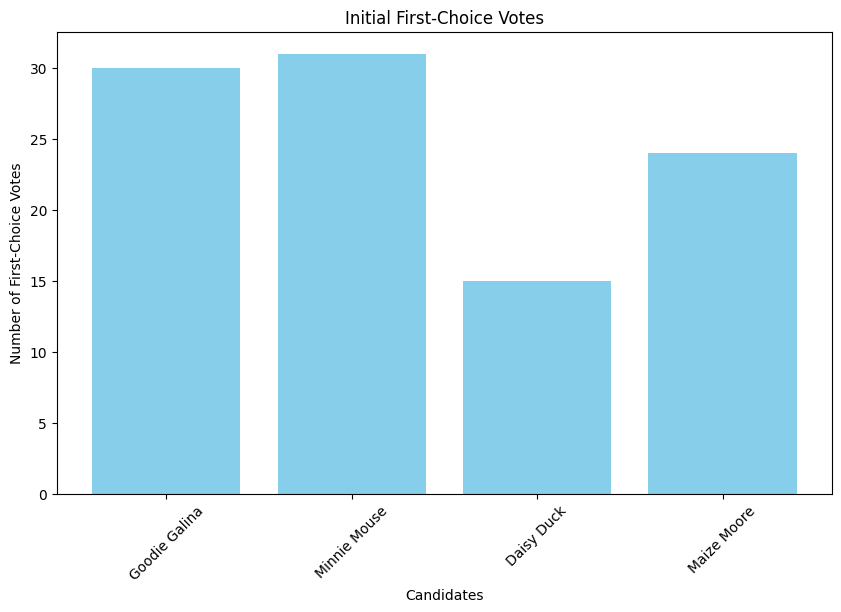


Round 1:
Goodie Galina: 30 votes
Minnie Mouse: 31 votes
Daisy Duck: 15 votes
Maize Moore: 24 votes
Eliminating candidate(s) with the fewest votes (15 votes): ['Daisy Duck']
Votes after elimination in round 1:
Voter 1: ['Goodie Galina', 'Minnie Mouse', 'Maize Moore']
Voter 2: ['Minnie Mouse', 'Goodie Galina', 'Maize Moore']
Voter 3: ['Minnie Mouse', 'Goodie Galina', 'Maize Moore']
Voter 4: ['Goodie Galina', 'Minnie Mouse', 'Maize Moore']
Voter 5: ['Goodie Galina', 'Maize Moore', 'Minnie Mouse']
Voter 6: ['Minnie Mouse', 'Maize Moore', 'Goodie Galina']
Voter 7: ['Minnie Mouse', 'Maize Moore', 'Goodie Galina']
Voter 8: ['Goodie Galina', 'Minnie Mouse', 'Maize Moore']
Voter 9: ['Maize Moore', 'Minnie Mouse', 'Goodie Galina']
Voter 10: ['Maize Moore', 'Goodie Galina', 'Minnie Mouse']
Voter 11: ['Maize Moore', 'Goodie Galina', 'Minnie Mouse']
Voter 12: ['Minnie Mouse', 'Goodie Galina', 'Maize Moore']
Voter 13: ['Maize Moore', 'Goodie Galina', 'Minnie Mouse']
Voter 14: ['Maize Moore', 'Minni

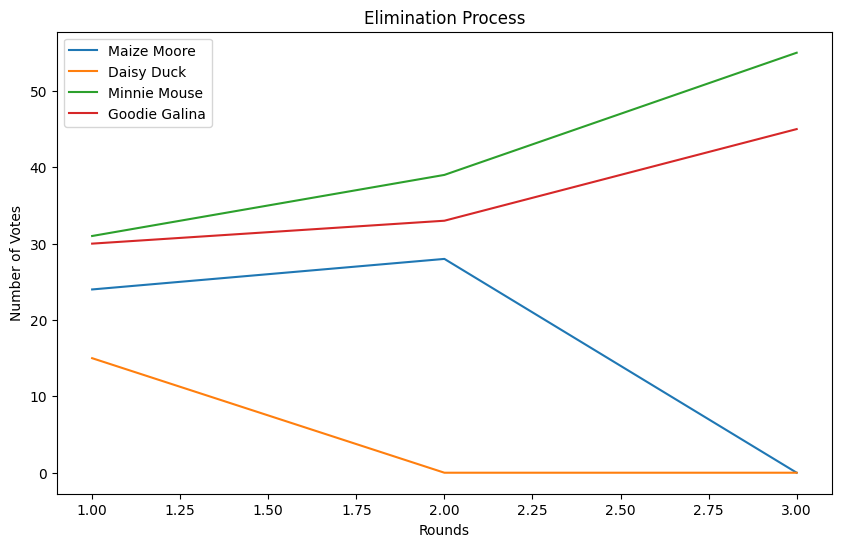


For Vice President:


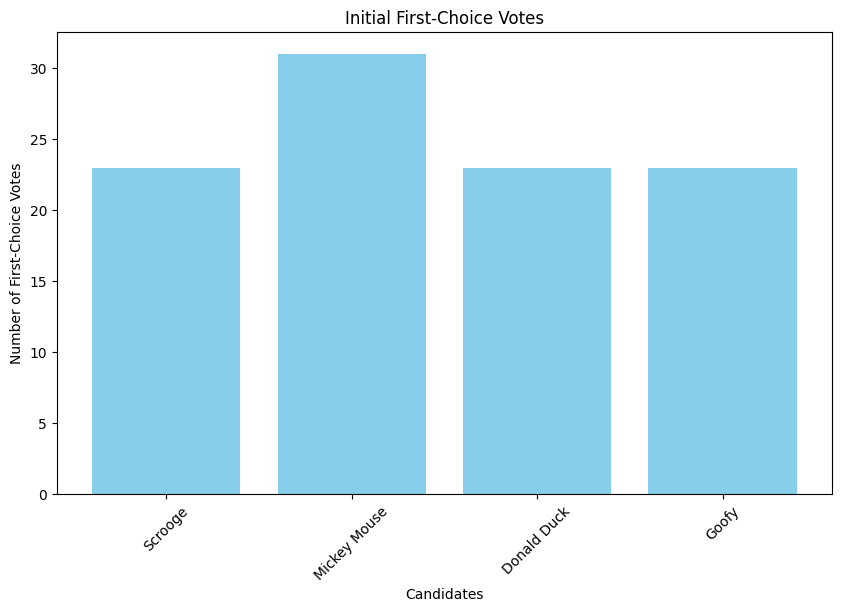


Round 1:
Scrooge: 23 votes
Mickey Mouse: 31 votes
Donald Duck: 23 votes
Goofy: 23 votes
Eliminating candidate(s) with the fewest votes (23 votes): ['Scrooge', 'Donald Duck', 'Goofy']
Votes after elimination in round 1:
Voter 1: ['Mickey Mouse']
Voter 2: ['Mickey Mouse']
Voter 3: ['Mickey Mouse']
Voter 4: ['Mickey Mouse']
Voter 5: ['Mickey Mouse']
Voter 6: ['Mickey Mouse']
Voter 7: ['Mickey Mouse']
Voter 8: ['Mickey Mouse']
Voter 9: ['Mickey Mouse']
Voter 10: ['Mickey Mouse']
Voter 11: ['Mickey Mouse']
Voter 12: ['Mickey Mouse']
Voter 13: ['Mickey Mouse']
Voter 14: ['Mickey Mouse']
Voter 15: ['Mickey Mouse']
Voter 16: ['Mickey Mouse']
Voter 17: ['Mickey Mouse']
Voter 18: ['Mickey Mouse']
Voter 19: ['Mickey Mouse']
Voter 20: ['Mickey Mouse']
Voter 21: ['Mickey Mouse']
Voter 22: ['Mickey Mouse']
Voter 23: ['Mickey Mouse']
Voter 24: ['Mickey Mouse']
Voter 25: ['Mickey Mouse']
Voter 26: ['Mickey Mouse']
Voter 27: ['Mickey Mouse']
Voter 28: ['Mickey Mouse']
Voter 29: ['Mickey Mouse']
Voter 

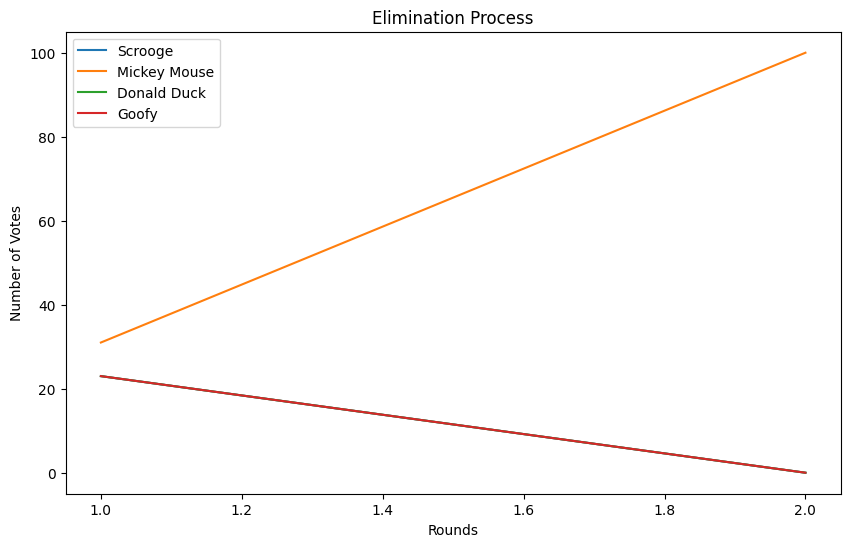

In [16]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import defaultdict

# Define candidates
president_candidates = ["Maize Moore", "Daisy Duck", "Minnie Mouse", "Goodie Galina"]
vp_candidates = ["Scrooge", "Mickey Mouse", "Donald Duck", "Goofy"]

# Define number of voters
num_voters = 100

# Generate random votes for President
president_votes = [random.sample(president_candidates, len(president_candidates)) for _ in range(num_voters)]

# Generate random votes for Vice President
vp_votes = [random.sample(vp_candidates, len(vp_candidates)) for _ in range(num_voters)]

# Create DataFrame
data = {
    'eventid': [500023351] * (2 * num_voters),
    'questionid': [500023351001] * num_voters + [500023351002] * num_voters,
    'questiondesc': ["Who would you nominate as candidate for President"] * num_voters + 
                    ["Who would you nominate as candidate for Vice President"] * num_voters,
    'statements': [','.join(map(str, range(500023351001001, 500023351001001 + len(president_candidates))))] * num_voters +
                  [','.join(map(str, range(500023351002001, 500023351002001 + len(vp_candidates))))] * num_voters,
    'statementdescs': [','.join(vote) for vote in president_votes] + [','.join(vote) for vote in vp_votes]
}

df = pd.DataFrame(data)

# Plotting functions
def plot_initial_first_choice_votes(df, questionid, candidates):
    # Filter data for the specific question
    question_data = df[df['questionid'] == questionid]

    # Extract votes
    votes = question_data['statementdescs'].apply(lambda x: x.split(',')).tolist()

    # Count the first-choice votes
    first_choice_counts = defaultdict(int)
    for vote in votes:
        if vote:
            first_choice_counts[vote[0]] += 1

    # Plot the first-choice votes
    plt.figure(figsize=(10, 6))
    plt.bar(first_choice_counts.keys(), first_choice_counts.values(), color='skyblue')
    plt.xlabel('Candidates')
    plt.ylabel('Number of First-Choice Votes')
    plt.title('Initial First-Choice Votes')
    plt.xticks(rotation=45)
    plt.show()

def plot_elimination_process(df, questionid, candidates):
    # Filter data for the specific question
    question_data = df[df['questionid'] == questionid]
    
    # Extract votes
    votes = question_data['statementdescs'].apply(lambda x: x.split(',')).tolist()
    
    rounds = 1
    elimination_process = []

    while True:
        vote_counts = defaultdict(int)
        
        # Count the first-choice votes
        for vote in votes:
            if vote:
                vote_counts[vote[0]] += 1
        
        # Store the counts for plotting
        elimination_process.append(vote_counts.copy())

        # Print current vote counts
        print(f"\nRound {rounds}:")
        for candidate, count in vote_counts.items():
            print(f"{candidate}: {count} votes")

        # Find the candidate with the most votes
        max_votes = max(vote_counts.values())
        total_votes = sum(vote_counts.values())

        # Check if the candidate has more than half of the votes
        if max_votes > total_votes / 2:
            print(f"Winner found in round {rounds}:")
            print(f"{max(vote_counts, key=vote_counts.get)} with {max_votes} votes")
            break

        # Eliminate the candidate with the fewest votes
        min_votes = min(vote_counts.values())
        candidates_to_eliminate = [candidate for candidate, votes in vote_counts.items() if votes == min_votes]

        print(f"Eliminating candidate(s) with the fewest votes ({min_votes} votes): {candidates_to_eliminate}")

        for candidate in candidates_to_eliminate:
            for vote in votes:
                if candidate in vote:
                    vote.remove(candidate)

        # Print the updated votes after elimination
        print(f"Votes after elimination in round {rounds}:")
        for i, vote in enumerate(votes, start=1):
            print(f"Voter {i}: {vote}")

        rounds += 1
    
    # Plot the elimination process
    plt.figure(figsize=(10, 6))
    for candidate in candidates:
        candidate_votes = [round_counts.get(candidate, 0) for round_counts in elimination_process]
        plt.plot(range(1, len(elimination_process) + 1), candidate_votes, label=candidate)

    plt.xlabel('Rounds')
    plt.ylabel('Number of Votes')
    plt.title('Elimination Process')
    plt.legend()
    plt.show()

# Example usage
print("For President:")
plot_initial_first_choice_votes(df, 500023351001, president_candidates)
plot_elimination_process(df, 500023351001, president_candidates)

print("\nFor Vice President:")
plot_initial_first_choice_votes(df, 500023351002, vp_candidates)
plot_elimination_process(df, 500023351002, vp_candidates)


## First check, does anyone have 50+1 then it is done. 

## Second check, if no one has that. then, you tally the first rank. 

# Java one you run per contest, one by one, and makes a JSON. and you can put it in the RCV tool. 

In [12]:
%pip install pyrcv

  Using cached pyrcv-1.0.3-py2.py3-none-any.whl.metadata (3.2 kB)
  Using cached icontract-2.6.6-py3-none-any.whl.metadata (10 kB)
  Using cached plotly-5.22.0-py3-none-any.whl.metadata (7.1 kB)
Using cached pyrcv-1.0.3-py2.py3-none-any.whl (14 kB)
Using cached icontract-2.6.6-py3-none-any.whl (38 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 2.4 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
